In [2]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
dir(iris)


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.feature_names


In [3]:
X = iris.data[:, [0, 1]]
X.shape


(150, 2)

In [4]:
y_target = iris.target
y_target.shape

(150,)

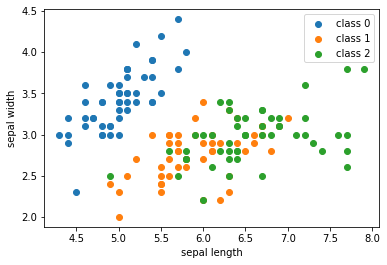

In [5]:
plt.scatter(X[y_target==0,0], X[y_target==0, 1], label='class 0')
plt.scatter(X[y_target==1,0], X[y_target==1,1], label='class 1')
plt.scatter(X[y_target==2,0], X[y_target==2,1], label='class 2')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

In [7]:
y = y_target.copy()
np.unique(y)

array([0, 1, 2])

In [8]:
y[y==2]=1
np.unique(y)

array([0, 1])

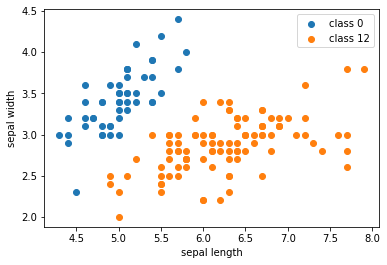

In [9]:
plt.scatter(X[y==0,0], X[y==0,1], label='class 0')
plt.scatter(X[y==1,0], X[y==1,1], label='class 12')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()


In [10]:
y[y==0] = -1
np.unique(y)

array([-1,  1])

In [15]:
class Model:
    def __init__(self):
        pass

    def sign(self, x, w, b):

        y = np.dot(x, w) + b

        return y

    def fit(self, x_train, y_train):

        self.w = np.zeros(x_train.shape[1], dtype=np.float32)

        self.b = 0

        self.l_rate = 0.1

        is_wrong = False

        while not is_wrong:

            wring_count = 0
            for d in range(len(x_train)):
                x = x_train[d]
                y = y_train[d]
                if y * self.sign(x, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, x)
                    self.b = self.b + self.l_rate * y
                    wring_count += 1

            if wring_count == 0:
                is_wrong = True
        return "Perceptron Model!"

    def predict(self, x):
        y_pred = self.sign(x, self.w, self.b)
        y_pred[y_pred>0] = 1
        y_pred[y_pred<0] = -1
        return y_pred.astype(int)

    def score(self):
        pass

In [18]:
perceptron = Model()
perceptron.fit(X, y)
perceptron.w

array([  7.9 , -10.07])

In [19]:
perceptron.b


-12.399999999999972

In [20]:
y_pred = perceptron.predict(X)

from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred))

1.0


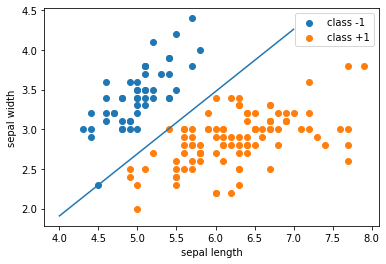

In [21]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.scatter(X[y==-1,0], X[y==-1,1], label='class -1')
plt.scatter(X[y==1,0], X[y==1,1], label='class +1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [26]:
class RandModel:
    def __init__(self, l_rate = 0.1):
        self.l_rate = l_rate

    def sign(self, x, w, b):

        y = np.dot(x, w) + b

        return y

    def fit(self, x_train, y_train):

        self.wrong = np.inf

        it = 0

        it_max = 1000

        is_wrong = False

        while not is_wrong:

            wb = 2*np.random.random_sample((3, 1)) - 1

            w = wb[: 2]

            b = wb[2]

            wrong_count = 0

            for d in range(len(x_train)):
                x = x_train[d]

                y = y_train[d]

                if y * self.sign(x, w, b) <= 0:

                    wrong_count += 1

            if wrong_count == 0:
                is_wrong = True

            if wrong_count < self.wrong:
                self.wrong = wrong_count
                self.w = w
                self.b = b

            it += 1
            if it > it_max:
                break

        return "Perceptron Model!"

    def predict(self, x):
        y_pred = self.sign(x, self.w, self.b)
        y_pred[y_pred > 0] = 1
        y_pred[y_pred < 0] = -1

        return y_pred.astype(int)

    def score(self):
        pass

In [27]:
rand_model = RandModel()

rand_model.fit(X, y)

rand_model.w

array([[ 0.65906116],
       [-0.93549838]])

In [28]:
pR = RandModel()
pR.fit(X, y)
np.round(pR.w,4)
np.round(pR.b,4)
pR.wrong

1

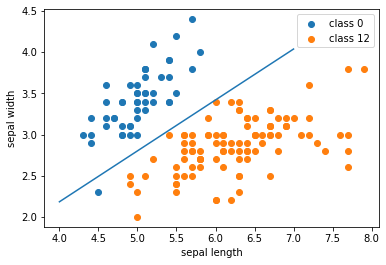

In [29]:
x_points = np.linspace(4, 7, 10)
y_ = -(pR.w[0] * x_points + pR.b) / pR.w[1]
plt.plot(x_points, y_)

plt.scatter(X[y==-1,0], X[y==-1,1], label='class 0')
plt.scatter(X[y==1,0], X[y==1,1], label='class 12')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [30]:
X21 = np.array([[3,3],
             [4,3],
             [1,1]])
y21 = np.array([1,1,-1])



In [31]:
import sklearn
from sklearn.linear_model import Perceptron
sklearn.__version__

'0.23.2'

In [32]:
clf = Perceptron(fit_intercept=True,
                 max_iter=1000,
                 tol=None,
                 shuffle=True)

clf.fit(X21, y21)

print(clf.coef_)

[[1. 0.]]


In [33]:
print(clf.intercept_)

[-2.]


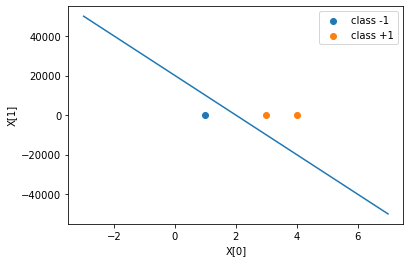

In [34]:
sw = clf.coef_[0]
sb = clf.intercept_[0]

x_points = np.linspace(-3, 7, 10)
if sw[1] == 0:
    sw[1] += 0.0001
y_ = -(sw[0] * x_points + sb) / sw[1]

plt.plot(x_points, y_)
plt.scatter(X21[y21==-1,0], X21[y21==-1,1], label='class -1')
plt.scatter(X21[y21==1,0], X21[y21==1,1], label='class +1')
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.legend()
